In [1]:
#网络结构：
#输入层：4 个特征
#隐藏层 1：5 个神经元，使用 ReLU 激活函数
#隐藏层 2：3 个神经元，使用 ReLU 激活函数
#输出层：2 个神经元，使用 Softmax 激活函数（用于二分类）

In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

In [4]:
#运行在cuda
device = torch.device("cuda" if torch.cuda.is_available else "cpu")

In [8]:
class SimpleNN(nn.Module):
  def __init__(self, w1, w2, w3, b1, b2, b3):
    super().__init__()
    self.layer1 = nn.Linear(4, 5)
    self.layer2 = nn.Linear(5, 3)
    self.layer3 = nn.Linear(3, 2)

    self.layer1.weight.data.copy_(w1)
    self.layer1.bias.data.copy_(b1.flatten())

    self.layer2.weight.data.copy_(w2)
    self.layer2.bias.data.copy_(b2.flatten())

    self.layer3.weight.data.copy_(w3)
    self.layer3.bias.data.copy_(b3.flatten())

  def forward(self, x):
    x = torch.relu(self.layer1(x))
    x = torch.relu(self.layer2(x))
    x = self.layer3(x)
    return x

epoch: 1 loss: 0.6900
epoch: 101 loss: 0.6405
epoch: 201 loss: 0.5961
epoch: 301 loss: 0.5439
epoch: 401 loss: 0.4798
epoch: 501 loss: 0.4017
epoch: 601 loss: 0.3134
epoch: 701 loss: 0.2279
epoch: 801 loss: 0.1591
epoch: 901 loss: 0.1112
epoch: 1001 loss: 0.0802
epoch: 1101 loss: 0.0598
epoch: 1201 loss: 0.0460
epoch: 1301 loss: 0.0364
epoch: 1401 loss: 0.0296
epoch: 1501 loss: 0.0245
epoch: 1601 loss: 0.0207
epoch: 1701 loss: 0.0178
epoch: 1801 loss: 0.0155
epoch: 1901 loss: 0.0136
epoch: 2001 loss: 0.0121
epoch: 2101 loss: 0.0108
epoch: 2201 loss: 0.0098
epoch: 2301 loss: 0.0089
epoch: 2401 loss: 0.0081
epoch: 2501 loss: 0.0074
epoch: 2601 loss: 0.0069
epoch: 2701 loss: 0.0064
epoch: 2801 loss: 0.0059
epoch: 2901 loss: 0.0055
epoch: 3001 loss: 0.0052
epoch: 3101 loss: 0.0049
epoch: 3201 loss: 0.0046
epoch: 3301 loss: 0.0043
epoch: 3401 loss: 0.0041
epoch: 3501 loss: 0.0039
epoch: 3601 loss: 0.0037
epoch: 3701 loss: 0.0035
epoch: 3801 loss: 0.0034
epoch: 3901 loss: 0.0032

 the final 

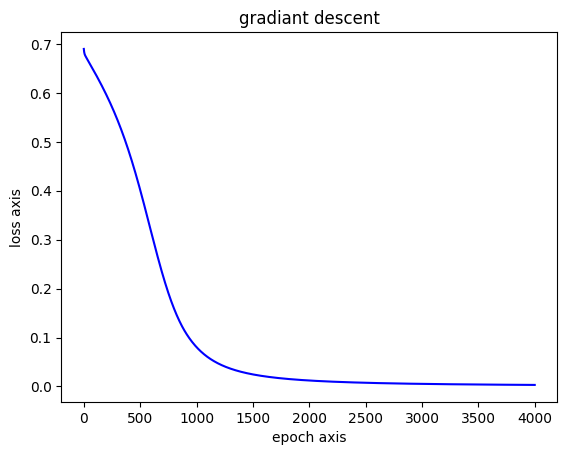

In [44]:
#参数初始化
w1 = torch.tensor([[0.1, 0.2, 0.3, 0.4],
          [0.5, 0.6, 0.7, 0.8],
          [0.2, 0.1, 0.4, 0.3],
          [0.3, 0.5, 0.1, 0.6],
          [0.7, 0.8, 0.2, 0.9]]).to(device) #shape (5,4)

b1= torch.tensor([[0.1],
          [0.2],
          [0.3],
          [0.4],
          [0.5]]).to(device) #shape (5,1)

w2 = torch.tensor([[0.1, 0.2, 0.3, 0.4, 0.5],
          [0.6, 0.7, 0.8, 0.9, 0.1],
          [0.2, 0.3, 0.4, 0.5, 0.6]]).to(device) #shape (3,5)

b2 = torch.tensor([[0.2],
          [0.3],
          [0.4]]).to(device) #shape (3,1)

w3 = torch.tensor([[0.5, 0.6, 0.7],
          [0.8, 0.9, 0.1]]).to(device) #shape(2,3)

b3 = torch.tensor([[0.1],
          [0.2]]).to(device) #shape (2,1)

x = torch.tensor([[0.1, 0.2, 0.3, 0.4],
          [0.5, 0.6, 0.7, 0.8],
          [0.9, 0.1, 0.2, 0.3]]).to(device) #shape (3,4)

y_true = torch.tensor([[1, 0],  # 类 0
            [0, 1],  # 类 1
            [1, 0]], dtype=torch.float32).to(device)  # 类 0).to(device) #shape (5,4)

model = SimpleNN(w1, w2, w3, b1, b2, b3).to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr =0.01)

epochs = 4000
losses = []

y_pred = model(x)

for epoch in range(epochs):
  y_pred = model(x)

  loss = criterion(y_pred, y_true)
  losses.append(loss.item())

  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  if epoch%100 == 0:
    print(f"epoch: {epoch + 1}",
      f"loss: {loss.item():.4f}")

final_prediction = model(x)
print("\n the final pred is:")
print(final_prediction)

print("\n the ture value is:")
print(y_pred)

plt.plot(range(epochs), losses, "blue")
plt.xlabel("epoch axis")
plt.ylabel("loss axis")
plt.title("gradiant descent")
plt.show()